In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from ml_model_cnn import data_generator
from ml_model_cnn import ml_models
from tensorflow.keras import models


### Load the data for ML model

In [2]:
holdout=2
nsteps = 1

In [3]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'

data = data_generator(output_dir, holdout=holdout, dim=1, csv=1, x_res=100, skip = 0)
X_train, Y_train, X_test, Y_test = data.read_1d()

X_train.head()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,...,u90,u91,u92,u93,u94,u95,u96,u97,u98,u99
0,0.0,0.031712,0.063392,0.095008,0.126529,0.157922,0.189156,0.220200,0.251022,0.281591,...,0.281591,0.251022,0.220200,0.189156,0.157922,0.126529,0.095008,0.063392,0.031712,0.0
1,0.0,0.031696,0.063360,0.094960,0.126465,0.157842,0.189061,0.220089,0.250895,0.281449,...,0.281449,0.250895,0.220089,0.189061,0.157842,0.126465,0.094960,0.063360,0.031696,0.0
2,0.0,0.031680,0.063328,0.094913,0.126401,0.157763,0.188966,0.219978,0.250769,0.281307,...,0.281307,0.250769,0.219978,0.188966,0.157763,0.126401,0.094913,0.063328,0.031680,0.0
3,0.0,0.031664,0.063296,0.094865,0.126338,0.157683,0.188870,0.219867,0.250643,0.281166,...,0.281166,0.250643,0.219867,0.188870,0.157683,0.126338,0.094865,0.063296,0.031664,0.0
4,0.0,0.031648,0.063264,0.094817,0.126274,0.157604,0.188775,0.219757,0.250516,0.281024,...,0.281024,0.250516,0.219757,0.188775,0.157604,0.126274,0.094817,0.063264,0.031648,0.0


### Split the data and train the model

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, 
                                                    shuffle=False)
model_instantiate = ml_models(nx = 100)
my_model = model_instantiate.cnn_model_1d_single_diff(K=1)

In [5]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l1 (Conv1D)                │ (None, 100, 6)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_l2 (Conv1D)                │ (None, 100, 6)         │           114 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Conv1D)                 │ (None, 100, 1)         │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
my_model.build(input_shape=(None, 100, 1))  # assuming nx = 100

my_model.compile(loss='mse', optimizer=optimizer)

In [7]:
history = my_model.fit(X_train, Y_train, epochs=32, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1669 - val_loss: 0.0159
Epoch 2/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0567 - val_loss: 4.6980e-04
Epoch 3/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - val_loss: 9.5934e-05
Epoch 4/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 6.2717e-05
Epoch 5/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9339e-04 - val_loss: 3.3448e-05
Epoch 6/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6289e-04 - val_loss: 1.3752e-05
Epoch 7/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9504e-05 - val_loss: 4.7368e-06
Epoch 8/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3084e-05 - val_loss: 2.3187e-06
Epoch 9/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9771e-05 - val_loss: 1.6346e-06
Epoch 10/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0252e-05 - val_loss: 1.3464e-06
Epoch 11/32
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4128e-06 - val_loss: 1.0802e-06
Epoch 

In [8]:
Y_train.shape

(1566, 100)

##### 🎨 Make the plots pretty 

In [9]:

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

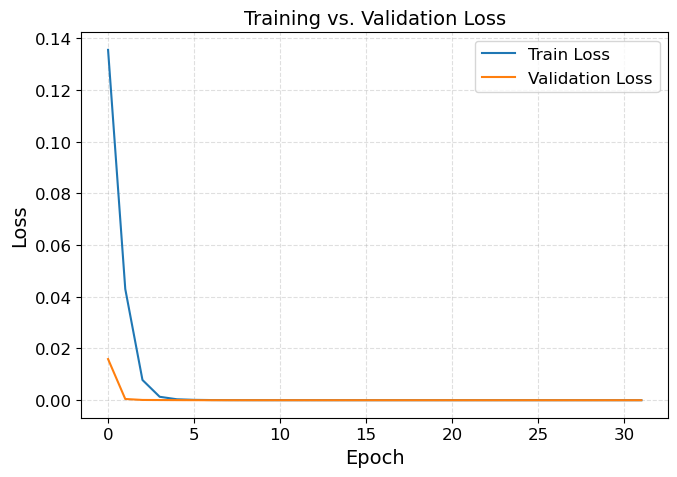

In [10]:

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

In [11]:
u_pred = my_model.predict(X_validation)
print(u_pred.shape)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(392, 100, 1)


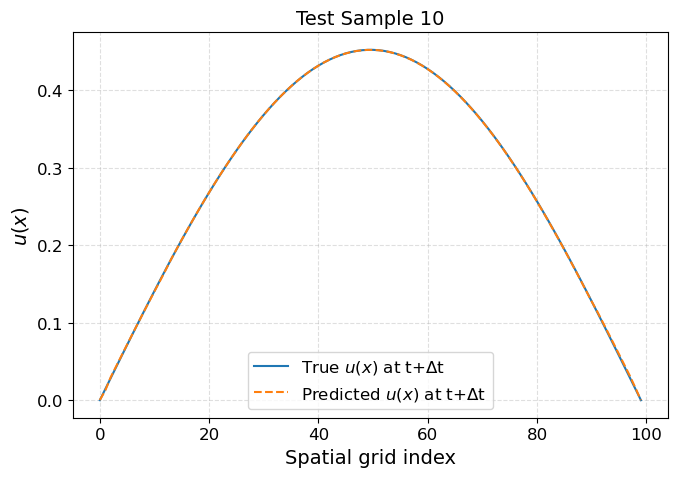

In [12]:

i = 10  # which test example to look at
Y_validation_np = Y_validation.values[..., np.newaxis]

fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(Y_validation_np[i, :, 0], label='True $u(x)$ at t+Δt')
plt.plot(u_pred[i, :, 0], '--', label='Predicted $u(x)$ at t+Δt')

plt.legend()
plt.xlabel('Spatial grid index')
plt.ylabel('$u(x)$')
plt.title(f'Test Sample {i}')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Predict the last snapshot, based on the last snapshot in the test set.

The train and test set contains the snapshots from 0 - t_final - holdout 

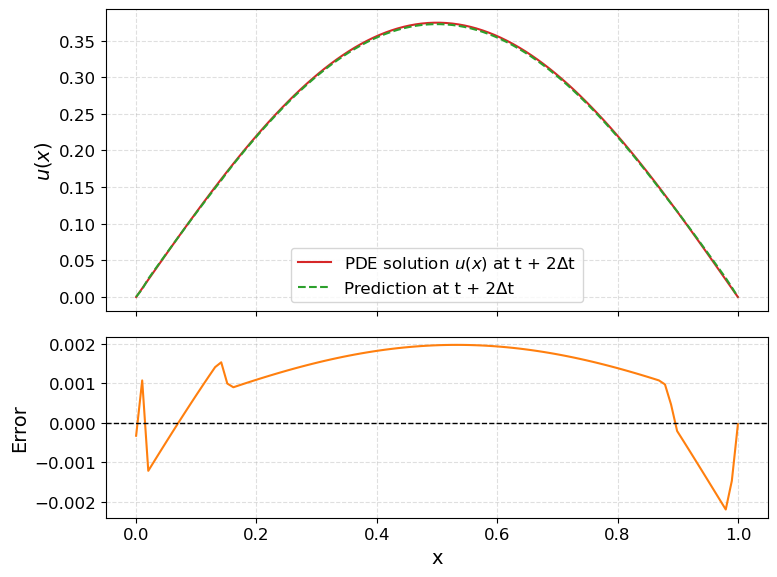

In [19]:
x = np.linspace(0, 1, X_test.shape[1])

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1.8]})

files = sorted([f for f in os.listdir('../data/csv_files/diffusion0.1/') if f.startswith('data_') and f.endswith('.csv')])


# Prediction
u_tn = X_test[1].reshape(1, 100, 1).astype(np.float32)
u_pred_new = my_model(u_tn, training=False).numpy()[0, :, 0]

# True solution
last_snap = len(files) - i
filename = os.path.join('../data/csv_files/diffusion0.1/', f'data_{last_snap}.csv')
data = pd.read_csv(filename)
var_u = data.filter(like='u_t').values.flatten()

# Plot true vs predicted
axs[0].plot(x, var_u, linewidth=1.5, color='tab:red', label=f'PDE solution $u(x)$ at t + 2Δt')
axs[0].plot(x, u_pred_new, '--', linewidth=1.5, color='tab:green', label=f'Prediction at t + 2Δt')

# Plot error
error = var_u - u_pred_new
axs[1].plot(x, error, linewidth=1.5, color='tab:orange',label=f'Error t={last_snap}')
axs[0].legend()
# Top: Predictions vs PDE
axs[0].set_ylabel('$u(x)$')
# axs[0].set_title('Predicted vs Actual Solutions (Top), Errors (Bottom)')
#axs[0].legend(ncol=3)
axs[0].grid(True, linestyle='--', alpha=0.4)

# Bottom: Errors
axs[1].axhline(0, color='k', linestyle='--', linewidth=1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
#axs[1].legend(ncol=4)
axs[1].grid(True, linestyle='--', alpha=0.4)
plt.savefig('../plot/prediction.png',dpi=300)
fig.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


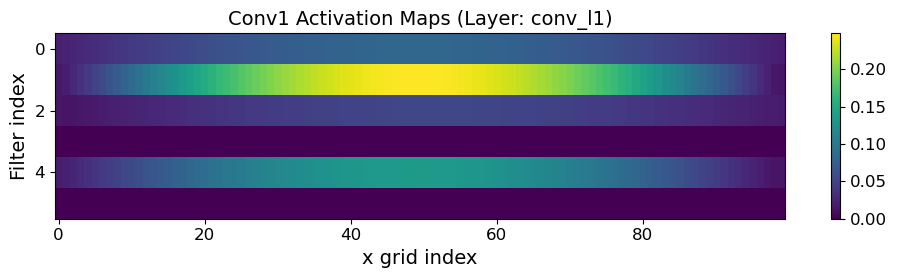

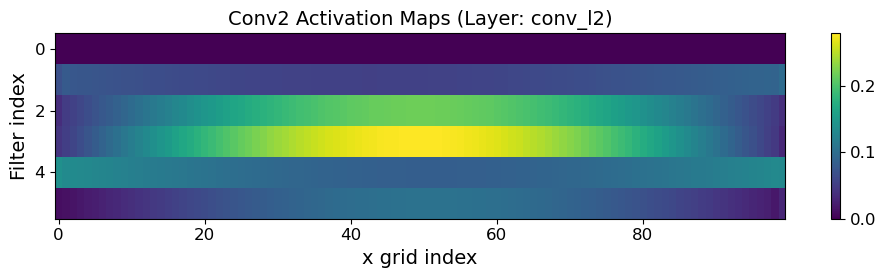

In [14]:
# Trigger model build if not done
_ = my_model.predict(X_test[:2])  # or any dummy input with shape (1, nx, 1)

# Get intermediate models
layer_out_l1 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)
layer_out_l2 = models.Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l2').output)

# Compute activations
activ_l1 = layer_out_l1.predict(X_test[:1])
activ_l2 = layer_out_l2.predict(X_test[:1])

# Plot conv_l1 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l1[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv1 Activation Maps (Layer: conv_l1)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

# Plot conv_l2 activations
plt.figure(figsize=(10, 3))
plt.imshow(activ_l2[0].T, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("Conv2 Activation Maps (Layer: conv_l2)")
plt.ylabel("Filter index")
plt.xlabel("x grid index")
plt.tight_layout()

plt.show()

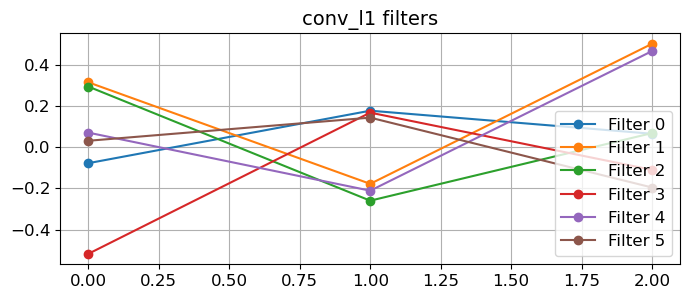

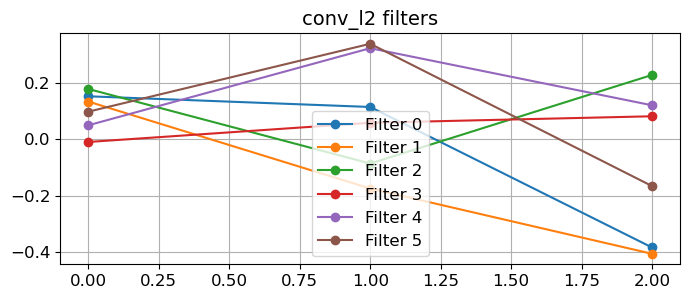

In [15]:
def plot_filters(layer_name):
    weights = my_model.get_layer(layer_name).get_weights()[0]  # shape: (kernel_size, in_channels, out_channels)
    kernel_size, in_channels, out_channels = weights.shape

    plt.figure(figsize=(8, 3))
    for i in range(out_channels):
        plt.plot(weights[:, 0, i],'o-', label=f'Filter {i}')
    plt.title(f'{layer_name} filters')
    plt.grid(True)
    plt.legend()
    plt.show()

# Filters from first conv layer
plot_filters('conv_l1')

# Filters from second conv layer
plot_filters('conv_l2')

In [16]:
# Get conv_l1 weights: shape (3, 1, 6)
weights = my_model.get_layer('conv_l1').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 1 = {cos_sim:.4f}")
    
weights = my_model.get_layer('conv_l2').get_weights()[0]
weights = weights[:, 0, :]  # shape: (3, 6)

# Normalize each filter for comparison (up to scale)
normalized_filters = weights / np.linalg.norm(weights, axis=0, keepdims=True)

# Define FD Laplacian filter
fd_laplacian = np.array([1.0, -2.0, 1.0])
fd_norm = fd_laplacian / np.linalg.norm(fd_laplacian)

# Compare using cosine similarity
for i in range(normalized_filters.shape[1]):
    cos_sim = np.dot(normalized_filters[:, i], fd_norm)
    print(f"Filter {i}: Cosine similarity to [1, -2, 1] for layer 2 = {cos_sim:.4f}")

Filter 0: Cosine similarity to [1, -2, 1] for layer 1 = -0.7344
Filter 1: Cosine similarity to [1, -2, 1] for layer 1 = 0.7742
Filter 2: Cosine similarity to [1, -2, 1] for layer 1 = 0.9042
Filter 3: Cosine similarity to [1, -2, 1] for layer 1 = -0.7080
Filter 4: Cosine similarity to [1, -2, 1] for layer 1 = 0.7580
Filter 5: Cosine similarity to [1, -2, 1] for layer 1 = -0.7533
Filter 0: Cosine similarity to [1, -2, 1] for layer 2 = -0.4387
Filter 1: Cosine similarity to [1, -2, 1] for layer 2 = 0.0679
Filter 2: Cosine similarity to [1, -2, 1] for layer 2 = 0.7807
Filter 3: Cosine similarity to [1, -2, 1] for layer 2 = -0.1812
Filter 4: Cosine similarity to [1, -2, 1] for layer 2 = -0.5566
Filter 5: Cosine similarity to [1, -2, 1] for layer 2 = -0.7802


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


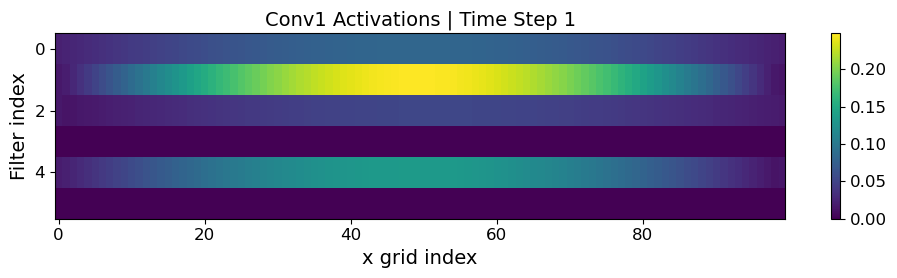

In [17]:
import matplotlib.animation as animation
from tensorflow.keras.models import Model
# Extract conv_l1 activation model
layer_model = Model(inputs=my_model.input, outputs=my_model.get_layer('conv_l1').output)

# Generate activations for all time steps in X_test
activations_seq = layer_model.predict(X_test)  # shape: (T, nx, filters)

# Setup animation
fig, ax = plt.subplots(figsize=(10, 3))
img = ax.imshow(activations_seq[0].T, aspect='auto', cmap='viridis', vmin=0, vmax=activations_seq.max())
cbar = fig.colorbar(img)
ax.set_title("Conv1 Activations Over Time")
ax.set_ylabel("Filter index")
ax.set_xlabel("x grid index")

def update(frame):
    img.set_data(activations_seq[frame].T)
    ax.set_title(f"Conv1 Activations | Time Step {frame}")
    return [img]

ani = animation.FuncAnimation(fig, update, frames=len(activations_seq), interval=200, blit=True)
ani.save("activations.mp4")
plt.tight_layout()
plt.show()

### Autoregressive CNN

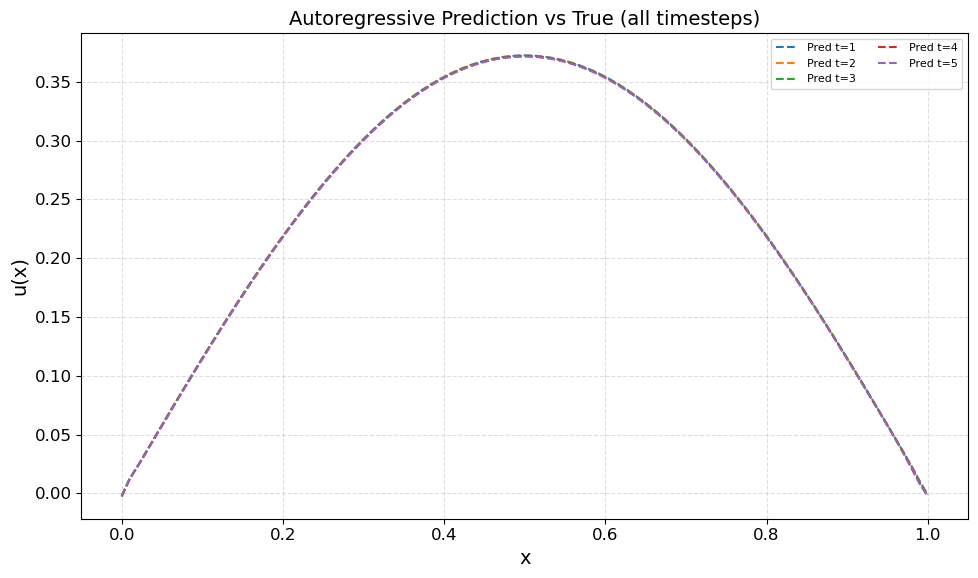

In [18]:
num_steps = 5
u_tn = X_test[0].reshape(1, 100, 1).astype(np.float32)
plt.figure(figsize=(10, 6))
# Prediction
for i in range (num_steps):
    u_pred_new = my_model(u_tn, training=False).numpy()[0, :, 0]
    u_tn = u_pred_new.reshape(1, 100, 1).astype(np.float32)
    plt.plot(x, u_pred_new, '--', label=f'Pred t={i+1}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Autoregressive Prediction vs True (all timesteps)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()